# A simple crib sheet for loading and plotting Arase satellite data

This notebook shows how to load and plot Arase satellite data with pySPEDAS and pyTplot. 

Please refer to the following website for the details of the data. 

https://ergsc.isee.nagoya-u.ac.jp/data_info/erg.shtml.en 

## Get started
It is assumed that you already have pySPEDAS and the latest version of ERG-SC plug-in installed on your python environment. The following commands import some necessary modules for loading and plotting the data. 

In [1]:
import pyspedas
import pytplot 
from pytplot.MPLPlotter.tplot import tplot     # a Matplotlib-based tplot is imported to replace the original one. 

You can import the ERG-SC plug-in from either the pyspedas module or the **ergpyspedas** module. The latter is kind of the bleeding-edge distribution: it always delivers the latest version of sub-modules some of which may still be in an experimental phase. The former, the main distribution of pySPEDAS, contains a stable version of the ERG-SC plug-in. 

In this notebook, we use the bleeding-edge version of the ERG-SC plug-in. For example, the data-load module for the MGF data can be imported with the following command:

In [2]:
from ergpyspedas.erg import mgf

## Basic commands of pyTplot and pySPEDAS
With MGF data, let us introduce some basic commands of pyTplot and pySPEDAS, which are used commonly for loading and visualizing data. Also see the official document of the pyTplot module at: 

https://pytplot.readthedocs.io/en/latest/index.html

### Load data and plot them with "tplot"

10-Mar-22 15:10:24: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
10-Mar-22 15:10:25: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
10-Mar-22 15:10:25: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

10-Mar-22 15:10:26: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


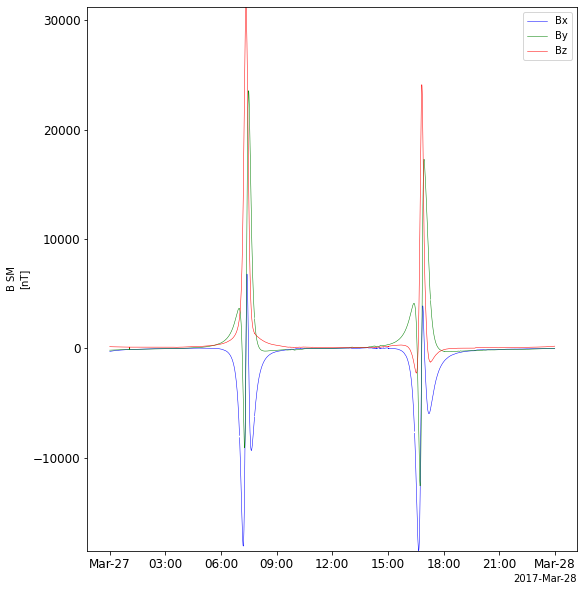

In [3]:
from ergpyspedas.erg import mgf
vars = mgf( trange=[ '2017-03-27', '2017-03-28' ] )  # load MGF Lv.2 8-s data for 0-24 UT on Mar. 27, 2017.
tplot( 'erg_mgf_l2_mag_8sec_sm' )

### Plot multiple tplot variables verticaly in a row on a window

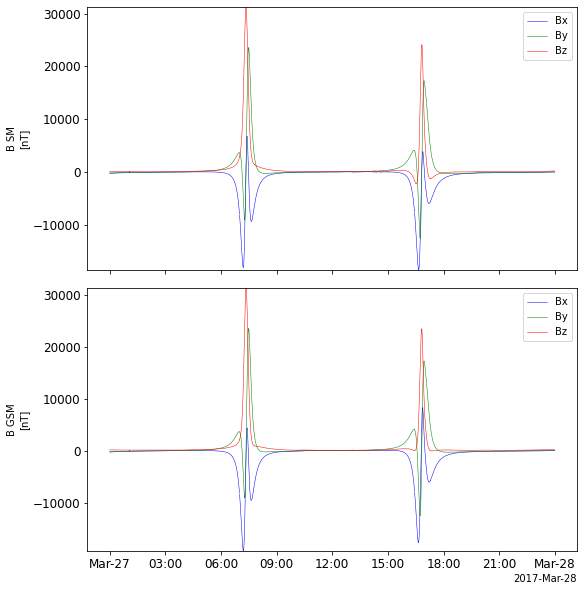

In [4]:
tplot( [ 'erg_mgf_l2_mag_8sec_sm', 'erg_mgf_l2_mag_8sec_gsm' ] )

### Limit the time range of a plot: `timespan()`

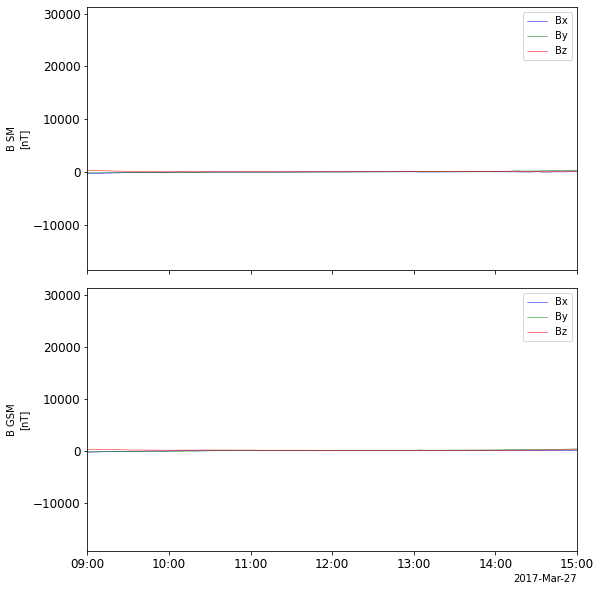

In [6]:
pytplot.timespan( '2017-03-27 09:00:00', 6, keyword='hours' )
tplot( [ 'erg_mgf_l2_mag_8sec_sm', 'erg_mgf_l2_mag_8sec_gsm' ] )

### Change the vertical scale of a plot: `ylim`

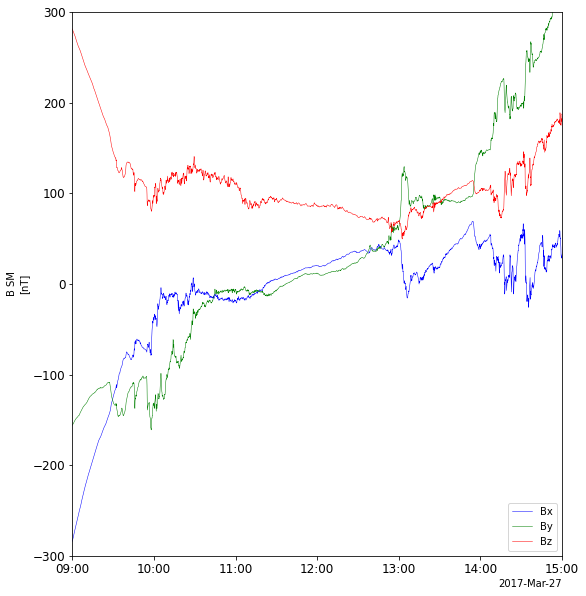

In [7]:
pytplot.ylim( 'erg_mgf_l2_mag_8sec_sm', -300., 300. )
tplot( [ 'erg_mgf_l2_mag_8sec_sm' ] )

### Change the title of the vertical axis: `options()`

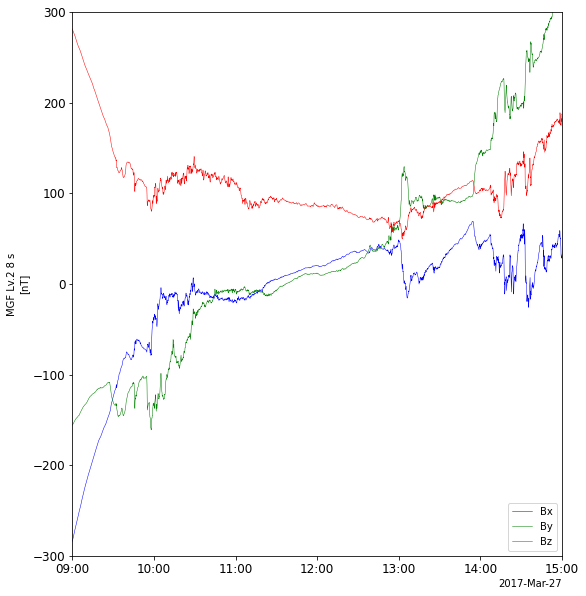

In [8]:
pytplot.options(  'erg_mgf_l2_mag_8sec_sm', 'ytitle', 'MGF Lv.2 8 s' )
tplot( [ 'erg_mgf_l2_mag_8sec_sm' ] )

### Change the contour scale for a spectrum-type plot: `zlim()`

10-Mar-22 15:21:58: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/03/
10-Mar-22 15:21:58: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/pwe/ofa/l2/spec/2017/03/erg_pwe_ofa_l2_spec_20170327_v02_01.cdf
10-Mar-22 15:21:59: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


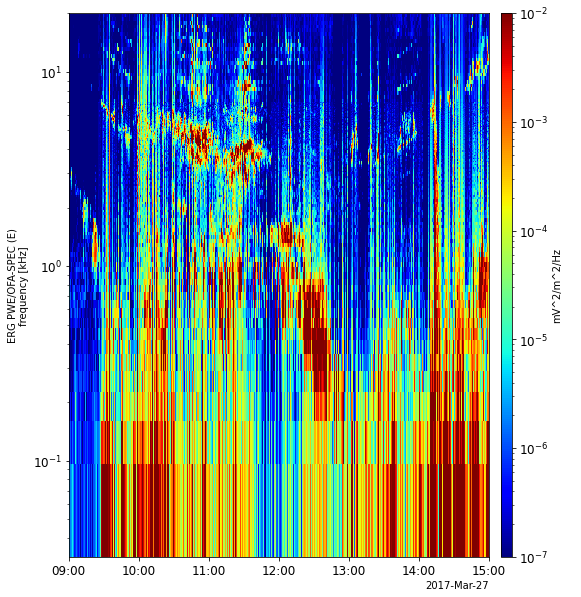

In [9]:
from ergpyspedas.erg import pwe_ofa
pwe_ofa( trange=[ '2017-03-27 09:00:00', '2017-03-27 15:00:00'] )
pytplot.zlim( 'erg_pwe_ofa_l2_spec_E_spectra_132', 1e-7, 1e-2 )
tplot( 'erg_pwe_ofa_l2_spec_E_spectra_132' )


### Show the list of loaded tplot variables: `tplot_names()`

In [10]:
vars = pytplot.tplot_names()


0 : erg_mgf_l2_epoch_8sec
1 : erg_mgf_l2_mag_8sec_dsi
2 : erg_mgf_l2_mag_8sec_gse
3 : erg_mgf_l2_mag_8sec_gsm
4 : erg_mgf_l2_mag_8sec_sm
5 : erg_mgf_l2_magt_8sec
6 : erg_mgf_l2_rmsd_8sec_dsi
7 : erg_mgf_l2_rmsd_8sec_gse
8 : erg_mgf_l2_rmsd_8sec_gsm
9 : erg_mgf_l2_rmsd_8sec_sm
10 : erg_mgf_l2_rmsd_8sec
11 : erg_mgf_l2_n_rmsd_8sec
12 : erg_mgf_l2_dyn_rng_8sec
13 : erg_mgf_l2_quality_8sec
14 : erg_mgf_l2_quality_8sec_gc
15 : erg_mgf_l2_igrf_8sec_dsi
16 : erg_mgf_l2_igrf_8sec_gse
17 : erg_mgf_l2_igrf_8sec_gsm
18 : erg_mgf_l2_igrf_8sec_sm
19 : erg_pwe_ofa_l2_spec_epoch_e132
20 : erg_pwe_ofa_l2_spec_E_spectra_132
21 : erg_pwe_ofa_l2_spec_quality_flag_e132
22 : erg_pwe_ofa_l2_spec_epoch_b132
23 : erg_pwe_ofa_l2_spec_B_spectra_132
24 : erg_pwe_ofa_l2_spec_quality_flag_b132


### Remove tplot variables that have been loaded

In [12]:
pytplot.del_data( 'erg_*' )
vars = pytplot.tplot_names()




----

## Load Arase satellite data




In [19]:
from ergpyspedas.erg import pwe_hfa, pwe_ofa, pwe_efd, mgf, xep, hep, mepe, lepe, mepi_nml, lepi, orb
pwe_hfa( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='spec' )
pwe_ofa( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='spec' )
pwe_efd( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='spec' )
mgf( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'] )
xep( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='omniflux' )
hep( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='omniflux' )
mepe( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='omniflux' )
lepe( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='omniflux' )
mepi_nml( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='omniflux' )
lepi( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'], datatype='omniflux' )


10-Mar-22 16:13:47: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/hfa/l2/spec/low/2017/04/
10-Mar-22 16:13:47: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/pwe/hfa/l2/spec/low/2017/04/erg_pwe_hfa_l2_spec_low_20170405_v01_02.cdf


Conflicting size for at least one dimension
Could not create coordinate v1_dim for variable erg_pwe_hfa_l2_low_spectra_eu_ev
Could not create coordinate v2_dim for variable erg_pwe_hfa_l2_low_spectra_eu_ev
Conflicting size for at least one dimension
Could not create coordinate v1_dim for variable erg_pwe_hfa_l2_low_spectra_eu_bg
Could not create coordinate v2_dim for variable erg_pwe_hfa_l2_low_spectra_eu_bg
Conflicting size for at least one dimension
Could not create coordinate v1_dim for variable erg_pwe_hfa_l2_low_spectra_ev_bg
Could not create coordinate v2_dim for variable erg_pwe_hfa_l2_low_spectra_ev_bg
 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Electric Field Data (HFA) Level 2 spectrum data

Information about ERG PWE HFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_o

10-Mar-22 16:13:50: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/04/
10-Mar-22 16:13:50: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/pwe/ofa/l2/spec/2017/04/erg_pwe_ofa_l2_spec_20170405_v02_01.cdf
10-Mar-22 16:13:52: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/efd/l2/spec/2017/04/
10-Mar-22 16:13:52: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/pwe/efd/l2/spec/2017/04/erg_pwe_efd_l2_spec_20170405_v02_02.cdf


 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 16:13:53: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/04/
10-Mar-22 16:13:53: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/mgf/l2/8sec/2017/04/erg_mgf_l2_8sec_20170405_v03.04.cdf


 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Electric Field Data (EFD) Level 2 spectrum data

Information about ERG PWE EFD

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/EFD: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Efd

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 16:13:55: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/xep/l2/omniflux/2017/04/
10-Mar-22 16:13:55: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/xep/l2/omniflux/2017/04/erg_xep_l2_omniflux_20170405_v01_00.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 16:13:55: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

10-Mar-22 16:13:55: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/hep/l2/omniflux/2017/04/
10-Mar-22 16:13:55: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/hep/l2/omniflux/2017/04/erg_hep_l2_omniflux_20170405_v03_01.cdf to /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/hep/l2/omniflux/2017/04/erg_hep_l2_omniflux_20170405_v03_01.cdf
10-Mar-22 16:13:55: Download complete: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/hep/l2/omniflux/2017/04/erg_hep_l2_omniflux_20170405_v03_01.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Extremely High-Energy Electron Experiment (XEP) Level 2 extremely high energy electron data

Information about ERG XEP

PI:  Nana Higashio
Affiliation: Space Environment Group, Aerospace Research and Development Directorate, Tsukuba Space Center, Japan Aerospace Exploration Agency, 2-1-1 Sengen, Tsukuba, Ibaraki 305-8505, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of XEP: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Xep

Contact: erg_xep_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 16:13:56: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/04/
10-Mar-22 16:13:56: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/mepe/l2/omniflux/2017/04/erg_mepe_l2_omniflux_20170405_v01_02.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) High-energy electron experiments (HEP) Level-2 omni flux data

PI:  Takefumi Mitani
Affiliation: ISAS, JAXA

- The rules of the road (RoR) common to the ERG project:
       https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for HEP data: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Hep

Contact: erg_hep_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 16:13:56: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/04/
10-Mar-22 16:13:56: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/lepe/l2/omniflux/2017/04/erg_lepe_l2_omniflux_20170405_v03_01.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - electron analyzer (MEP-e) electron omni flux data

PI:  Satoshi Kasahara
Affiliation: The University of Tokyo

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 16:13:56: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepi/l2/omniflux/2017/04/
10-Mar-22 16:13:56: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/mepi/l2/omniflux/2017/04/erg_mepi_l2_omniflux_20170405_v02_01.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Low-Energy Particle experiments - electron analyzer (LEP-e) Level 2 omni electron flux data

Information about ERG LEPe

PI:  Shiang-Yu Wang
Affiliation: Academia Sinica, Taiwan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of LEPe L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Lepe

Contact: erg_lepe_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 16:13:58: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepi/l2/omniflux/2017/04/
10-Mar-22 16:13:58: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/lepi/l2/omniflux/2017/04/erg_lepi_l2_omniflux_20170405_v03_00.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - ion mass analyzer (MEP-i) 3D ion omni flux data

PI:  Shoichiro Yokota
Affiliation: Osaka University

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-i data: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepi

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Low Energy Particle Ion (LEPi) Experiment 3D ion flux data

Information about ERG LEPi

PI:  Kazushi Asamura
Affiliation: ISAS, Jaxa

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of LEPi L2: htt

['erg_lepi_l2_omniflux_Epoch',
 'erg_lepi_l2_omniflux_FPDO',
 'erg_lepi_l2_omniflux_FHEDO',
 'erg_lepi_l2_omniflux_FODO',
 'erg_lepi_l2_omniflux_FPDO_raw',
 'erg_lepi_l2_omniflux_FHEDO_raw',
 'erg_lepi_l2_omniflux_FODO_raw']

In [20]:
vars = pytplot.tplot_names()

0 : erg_pwe_hfa_l2_low_Epoch
1 : erg_pwe_hfa_l2_low_spectra_eu
2 : erg_pwe_hfa_l2_low_spectra_ev
3 : erg_pwe_hfa_l2_low_spectra_bgamma
4 : erg_pwe_hfa_l2_low_spectra_esum
5 : erg_pwe_hfa_l2_low_spectra_er
6 : erg_pwe_hfa_l2_low_spectra_el
7 : erg_pwe_hfa_l2_low_spectra_e_mix
8 : erg_pwe_hfa_l2_low_spectra_e_ar
9 : erg_pwe_hfa_l2_low_spectra_eu_ev
10 : erg_pwe_hfa_l2_low_spectra_eu_bg
11 : erg_pwe_hfa_l2_low_spectra_ev_bg
12 : erg_pwe_hfa_l2_low_quality_flag
13 : erg_pwe_ofa_l2_spec_epoch_e132
14 : erg_pwe_ofa_l2_spec_E_spectra_132
15 : erg_pwe_ofa_l2_spec_quality_flag_e132
16 : erg_pwe_ofa_l2_spec_epoch_b132
17 : erg_pwe_ofa_l2_spec_B_spectra_132
18 : erg_pwe_ofa_l2_spec_quality_flag_b132
19 : erg_pwe_efd_l2_spec_spectra
20 : erg_pwe_efd_l2_spec_quality_flag
21 : erg_mgf_l2_epoch_8sec
22 : erg_mgf_l2_mag_8sec_dsi
23 : erg_mgf_l2_mag_8sec_gse
24 : erg_mgf_l2_mag_8sec_gsm
25 : erg_mgf_l2_mag_8sec_sm
26 : erg_mgf_l2_magt_8sec
27 : erg_mgf_l2_rmsd_8sec_dsi
28 : erg_mgf_l2_rmsd_8sec_gse
29 

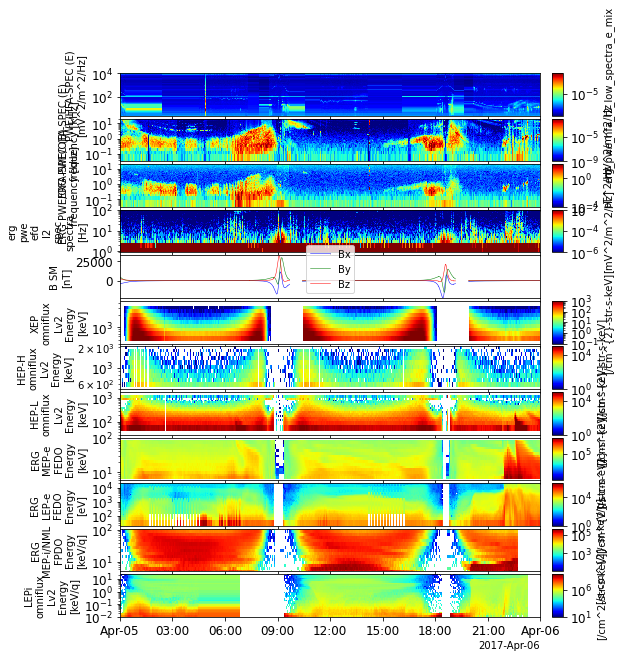

In [22]:
pytplot.timespan( '2017-04-05 00:00:00', 24, keyword='hours' )
tplot( [ 'erg_pwe_hfa_l2_low_spectra_e_mix', 'erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_efd_l2_spec_spectra', 'erg_mgf_l2_mag_8sec_sm', 'erg_xep_l2_FEDO_SSD', 'erg_hep_l2_FEDO_H', 'erg_hep_l2_FEDO_L', 'erg_mepe_l2_omniflux_FEDO', 'erg_lepe_l2_omniflux_FEDO', 'erg_mepi_l2_omniflux_FPDO', 'erg_lepi_l2_omniflux_FPDO'])

### Add some extra Xaxes to the bottom of the plot

10-Mar-22 18:38:47: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
10-Mar-22 18:38:47: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/orb/def/2017/erg_orb_l2_20170405_v03.cdf
10-Mar-22 18:38:48: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

10-Mar-22 18:38:49: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 18:38:53: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/MPLPlotter/tplot.py:230: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  this_axis.set_ylim(yrange)



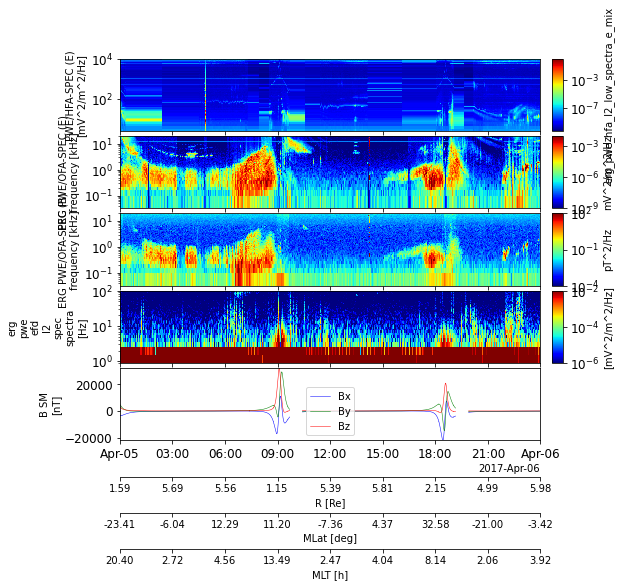

In [29]:
orb( trange=['2017-04-05 00:00:00', '2017-04-06 00:00:00'])
labels = pytplot.split_vec( 'erg_orb_l2_pos_rmlatmlt' )
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_x', 'ytitle', 'R [Re]' )
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_y', 'ytitle', 'MLat [deg]' )
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_z', 'ytitle', 'MLT [h]' )
tplot( [ 'erg_pwe_hfa_l2_low_spectra_e_mix', 'erg_pwe_ofa_l2_spec_E_spectra_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_efd_l2_spec_spectra', 'erg_mgf_l2_mag_8sec_sm'], var_label=labels )




----
## Use the part_products library to obtain particle spectra

An experimental version of the part_products library has just been implemented to the ERG-SC plug-in. So far only the bleeding-edge distribution of the plug-in contains the part_products. In near future, after fully tested, the ERG part_products will be merged to the main distribution of pySPEDAS. 

As of Mar., 2022, the following modules are released experimentally: 
- `erg_xep_part_products()`
- `erg_hep_part_products()`
- `erg_mep_part_products()`   for MEP-e and MEP-i Normal mode data
- `erg_lep_part_products()`     for LEP-e and LEP-i Normal mode data

They can be used with common arguments and options, similar to those of the (original) IDL version.  Several spectrum plots using part_products are demonstrated below to show how to use the library for Arase's particle data. 



### Generate a tplot variable containing energy-time spectra


In [33]:
# Load MEP-e Lv.2 3-D flux data 
pytplot.timespan( '2017-04-05 21:45:00', 2.25, keyword='hours' )
mepe( trange=[ '2017-04-05 21:45:00', '2017-04-05 23:59:59'], datatype='3dflux' )


10-Mar-22 19:08:19: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/3dflux/2017/04/
10-Mar-22 19:08:19: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/3dflux/2017/04/erg_mepe_l2_3dflux_20170405_v01_01.cdf to /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/mepe/l2/3dflux/2017/04/erg_mepe_l2_3dflux_20170405_v01_01.cdf
10-Mar-22 19:08:30: Download complete: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/mepe/l2/3dflux/2017/04/erg_mepe_l2_3dflux_20170405_v01_01.cdf
10-Mar-22 19:08:39: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Medium-Energy Particle experiments - electron analyzer (MEP-e) Level 2 3D electron flux data

PI:  Satoshi Kasahara
Affiliation: The University of Tokyo

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_mepe_l2_3dflux_FEDU',
 'erg_mepe_l2_3dflux_FEDU_n',
 'erg_mepe_l2_3dflux_FEEDU',
 'erg_mepe_l2_3dflux_count_raw',
 'erg_mepe_l2_3dflux_spin_phase']

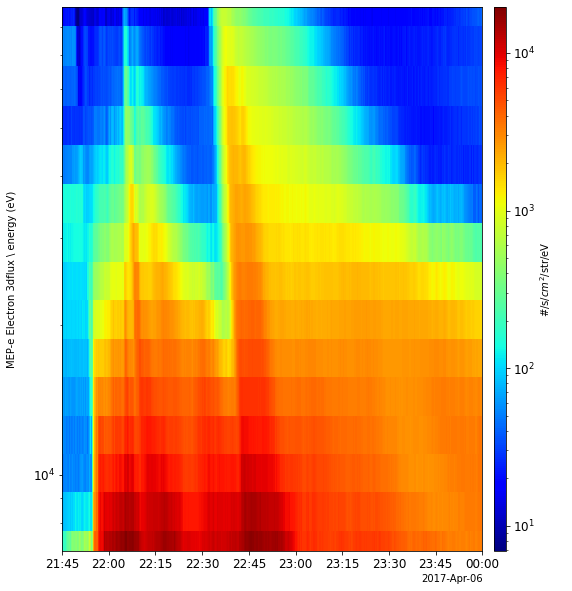

In [36]:
# Calculate energy-time spectra of the omni-dir. electron flux based on MEP-e data
from ergpyspedas.erg import erg_mep_part_products
vars = erg_mep_part_products( 'erg_mepe_l2_3dflux_FEDU', outputs='energy', trange=[ '2017-04-05 21:45:00', '2017-04-05 23:59:59'] )

tplot( 'erg_mepe_l2_3dflux_FEDU_energy' )


10-Mar-22 19:34:42: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/04/
10-Mar-22 19:34:42: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/mgf/l2/8sec/2017/04/erg_mgf_l2_8sec_20170405_v03.04.cdf
10-Mar-22 19:34:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Mar-22 19:34:44: File is current: /Users/horit/mnt/drobo2020/work/data//ergsc/satellite/erg/orb/def/2017/erg_orb_l2_20170405_v03.cdf
10-Mar-22 19:34:44: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

10-Mar-22 19:34:46: /Users/horit/.pyenv/versions/3.9.6/envs/39_pydarn_pyspedas/lib/python3.9/site-packages/pytplot/importers/cdf_to_tplot.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************
erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
tinterpol (linear) was applied to: erg_orb_l2_pos_gse_pgs_temp


10-Mar-22 19:34:51: erg_mepe_l2_3dflux_FEDU is 77% done.
10-Mar-22 19:34:53: /Users/horit/work/python/work/devel/pyspedas_plugin/ergpyspedas/erg/satellite/erg/particle/erg_pgs_limit_range.py:42: RuntimeWarning: invalid value encountered in fmod
  phi_max = np.fmod(data_in['phi'] + 0., 360.)



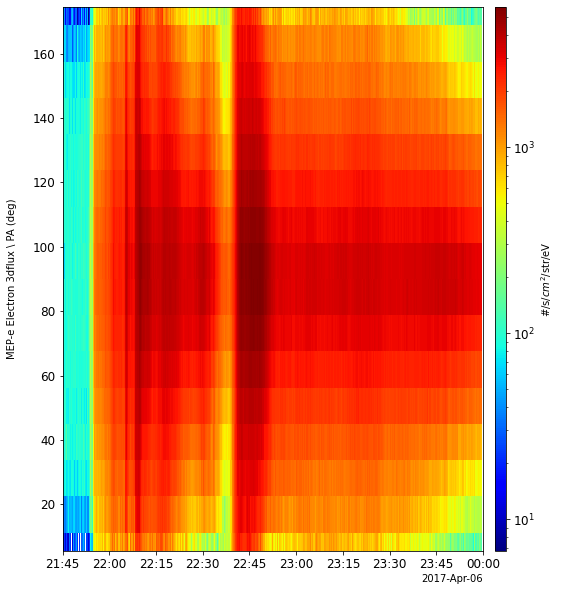

In [43]:
# Calculate pitch-angle-time spectra of electron flux based on MEP-e data

vars = mgf( trange=[ '2017-04-05 21:45:00', '2017-04-05 23:59:59'] ) # Load necessary B-field data
vars = orb( trange=[ '2017-04-05 21:45:00', '2017-04-05 23:59:59'] ) # Load necessary orbit data
mag_vn = 'erg_mgf_l2_mag_8sec_dsi'
pos_vn = 'erg_orb_l2_pos_gse'

vars = erg_mep_part_products( 'erg_mepe_l2_3dflux_FEDU', outputs='pa', energy=[15000., 22000.], fac_type='xdsi', mag_name=mag_vn, pos_name=pos_vn, trange=[ '2017-04-05 21:45:00', '2017-04-05 23:59:59'] )

tplot( 'erg_mepe_l2_3dflux_FEDU_pa' )


10-Mar-22 19:50:07: /Users/horit/work/python/work/devel/pyspedas_plugin/ergpyspedas/erg/satellite/erg/particle/erg_pgs_make_e_spec.py:30: RuntimeWarning: invalid value encountered in true_divide
  ave = data_array.sum(axis=1) / data['bins'].sum(axis=1)



erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
tinterpol (linear) was applied to: erg_orb_l2_pos_gse_pgs_temp


10-Mar-22 19:50:12: /Users/horit/work/python/work/devel/pyspedas_plugin/ergpyspedas/erg/satellite/erg/particle/erg_pgs_limit_range.py:42: RuntimeWarning: invalid value encountered in fmod
  phi_max = np.fmod(data_in['phi'] + 0., 360.)

10-Mar-22 19:50:12: /Users/horit/work/python/work/devel/pyspedas_plugin/ergpyspedas/erg/satellite/erg/particle/erg_pgs_make_e_spec.py:30: RuntimeWarning: invalid value encountered in true_divide
  ave = data_array.sum(axis=1) / data['bins'].sum(axis=1)



erg_mgf_l2_mag_8sec_dsi_shifted copied to erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_dsi_shifted_pgs_temp
erg_orb_l2_pos_gse copied to erg_orb_l2_pos_gse_pgs_temp
tinterpol (linear) was applied to: erg_orb_l2_pos_gse_pgs_temp


10-Mar-22 19:50:17: /Users/horit/work/python/work/devel/pyspedas_plugin/ergpyspedas/erg/satellite/erg/particle/erg_pgs_limit_range.py:42: RuntimeWarning: invalid value encountered in fmod
  phi_max = np.fmod(data_in['phi'] + 0., 360.)



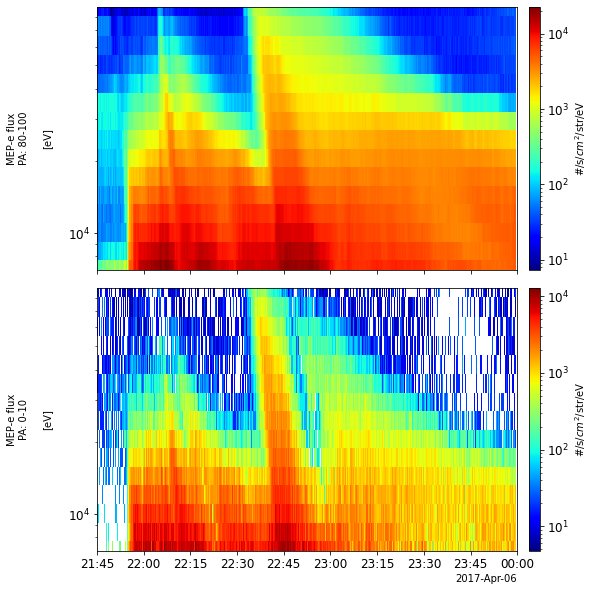

In [49]:
# Calculate energy-time spectra of electron flux for limited pitch-angle (PA) ranges

## Here we calculate energy-time spectra for PA = 0-10 deg and PA = 80-100 deg. 
vars = erg_mep_part_products( 'erg_mepe_l2_3dflux_FEDU', outputs='fac_energy', pitch=[80., 100.], fac_type='xdsi', mag_name=mag_vn, pos_name=pos_vn, trange=[ '2017-04-05 21:45:00', '2017-04-05 23:59:59'], suffix='_pa80-100' )
vars = erg_mep_part_products( 'erg_mepe_l2_3dflux_FEDU', outputs='fac_energy', pitch=[0., 10.], fac_type='xdsi', mag_name=mag_vn, pos_name=pos_vn, trange=[ '2017-04-05 21:45:00', '2017-04-05 23:59:59'], suffix='_pa0-10' )

## Decorate the obtained spectrum variables
pytplot.options( 'erg_mepe_l2_3dflux_FEDU_energy_mag_pa80-100', 'ytitle', 'MEP-e flux\nPA: 80-100\n\n[eV]')
pytplot.options( 'erg_mepe_l2_3dflux_FEDU_energy_mag_pa0-10', 'ytitle', 'MEP-e flux\nPA: 0-10\n\n[eV]')

tplot( ['erg_mepe_l2_3dflux_FEDU_energy_mag_pa80-100', 'erg_mepe_l2_3dflux_FEDU_energy_mag_pa0-10' ] )